In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# read data

In [5]:
dtype={'age':np.int64,
        'job' : np.str_,
        'marital' : np.str_,
        'education' : np.str_,
        'default' : np.str_,
        'housing' : np.str_,
        'loan':np.str_,
        'contact' : np.str_,
        'month' : np.str_,
        'day_of_week' : np.str_,
        'duration' : np.int64,
        'campaign':np.int64,
        'pdays':np.int64,
        'previous':np.int64,
        'poutcome':np.str_,
        'emp.var.rate':np.float64,
        'cons.price.idx':np.float64,
        'cons.conf.idx':np.float64,
        'euribor3m':np.float64,
        'nr.employed':np.float64,
        'y':np.str_}

data = pd.read_csv("bank_clean.csv",dtype=dtype, usecols=dtype)
# print data.head(1)

# Label encoding(convert string to int)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
con_col = [i for i in data.columns if (data.dtypes[i] == 'int64') | (data.dtypes[i] == 'float64')]
cat_col = [i for i in data.columns if (i not in con_col)]
for col in cat_col:
#     print ("label encoding %s:" % col)
    LBL_Model = preprocessing.LabelEncoder()
    LBL_Model.fit(data[col])
    labels = dict(zip(data[col].unique(), LBL_Model.transform(data[col].unique())))
#     print (labels)
    #print (LBL_Model.classes_)
    data[col] = LBL_Model.transform(data[col])

In [9]:
from sklearn.cross_validation import train_test_split
Train_X = data.drop('y',axis = 1)
Y = data['y']
X_train,X_test,Y_train,Y_test = train_test_split(Train_X,Y,test_size = 0.2)

# FOUR MODELS

In [10]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=31,max_depth=8)
clf.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=31, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [30]:
# https://stackoverflow.com/questions/42894871/how-to-plot-multiple-roc-curves-in-one-plot-with-legend-and-auc-scores-in-python

In [11]:
pred = clf.predict(X_test)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(15,15,15),max_iter=500)
mlp.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 15, 15), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [46]:
predictions = mlp.predict(X_test)

In [50]:
from sklearn import linear_model, decomposition, datasets
logistic = linear_model.LogisticRegression()
logistic.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
linear_result = logistic.predict(X_test)

In [64]:
from sklearn import svm
svm_ = svm.SVC(kernel='rbf')
svm_.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
svm_result = svm_.predict(X_test)

# Evaluate using auc

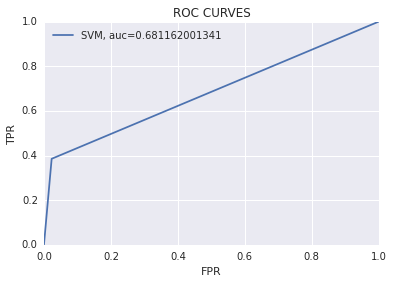

In [66]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(0).clf()

# fpr, tpr, thresh = metrics.roc_curve(Y_test, pred)
# auc = metrics.roc_auc_score(Y_test, pred)
# plt.plot(fpr,tpr,label="Random Forest Tree, auc="+str(auc))

# fpr2, tpr2, thresh2 = metrics.roc_curve(Y_test, predictions)
# auc2 = metrics.roc_auc_score(Y_test, predictions)
# plt.plot(fpr2,tpr2,label="Neural Network, auc="+str(auc2))

# fpr3, tpr3, thresh3 = metrics.roc_curve(Y_test, linear_result)
# auc3 = metrics.roc_auc_score(Y_test, linear_result)
# plt.plot(fpr3,tpr3,label="Logistic Regression, auc="+str(auc3))

fpr4, tpr4, thresh4 = metrics.roc_curve(Y_test, svm_result)
auc4 = metrics.roc_auc_score(Y_test, svm_result)
plt.plot(fpr4,tpr4,label="SVM, auc="+str(auc4))

plt.legend(loc=0)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVES')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.axis([40, 160, 0, 0.03])
plt.grid(True)

In [30]:
# https://stackoverflow.com/questions/31209016/python-pydot-and-decisiontree